<a href="https://colab.research.google.com/github/manish2393cool/ML-Python/blob/master/5_Trying_Assumptions_in_Linear_Regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random as r

style.use('fivethirtyeight')

In [0]:
# n= no of points step gap between each data points
def create_dataset(n, variance, step = 2, correlation=False):
  val = 1
  ys= []
  for i in range(n):
    y = val + r.randrange(-variance, variance)
    ys.append(y)
    if correlation and correlation == 'pos':
      val+=step
    if correlation and correlation == 'neg':
      val-=step
  xs = [i for i in range(len(ys))]
  return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

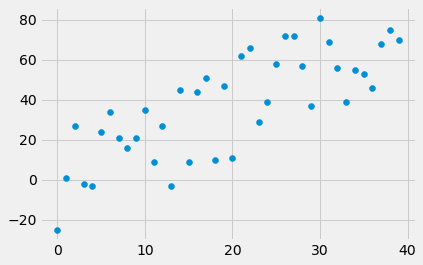

In [24]:
xs, ys = create_dataset(40, 30, 2, correlation='pos')

plt.scatter(xs,ys)
plt.show()

In [13]:
def best_fit_slope_intercept(xs,ys):
  m=(( (mean(xs)*mean(ys)) - mean(xs*ys) ) / (mean(xs)*mean(xs) - mean(xs*xs)) )
  b = mean(ys) - m*mean(xs)
  return m,b

m,b = best_fit_slope_intercept(xs,ys)
print(m,b)

2.590337711069418 -11.886585365853648


In [0]:
def squared_error(ys_orig, ys_line):
  return sum((ys_line - ys_orig)**2)

def coeff_of_determination(ys_orig, ys_line):
  ys_mean_line = [mean(ys_orig) for y in ys_orig]
  squared_error_y_regr =  squared_error(ys_orig, ys_line)
  squared_error_y_mean =  squared_error(ys_orig, ys_mean_line)
  return 1- (squared_error_y_regr / squared_error_y_mean)

R Squared Error:  0.4597936325865689


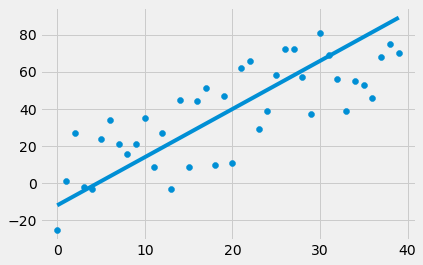

In [25]:
regression_line = [m*x + b for x in xs]
r_squared = coeff_of_determination(ys, regression_line)

print("R Squared Error: ",r_squared)
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

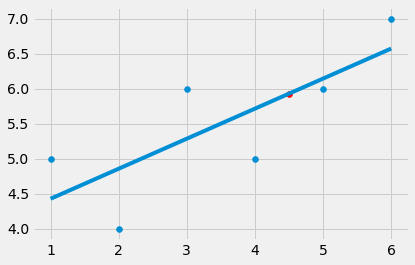

In [0]:
predict_x = 4.5
predict_y = m* predict_x + b

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, color='red')
plt.plot(xs, regression_line)
plt.show()